In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="5Dk9ZYrwYMOOh7ll3cP3")
project = rf.workspace("testprueba").project("recognition-id-kqdqg")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to recognition-id-1 in yolov11:: 100%|██████████| 258/258 [00:00<00:00, 4188.04it/s]


In [ ]:
# Especificar la ruta de acceso
file_path = '/content/recognition-id-1/data.yaml'

# Chequear si existe el archivo
if os.path.exists(file_path):
    print("El archivo existe.")
else:
    print("El archivo no existe.")

El archivo existe.


In [ ]:
# Obtener el directorio de trabajo actual
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# Listar
files = os. listdir (cwd)
print(f"Files and directories in '{cwd}': {files}")

Current working directory: /content
Files and directories in '/content': ['.config', 'recognition-id-1', 'sample_data']


In [ ]:
dir_path= cwd + '/sample_data'
for files in os.listdir(dir_path):
  os.remove(dir_path + "/" + files)
os.rmdir(dir_path)

In [ ]:
from ultralytics import YOLO
model = YOLO('yolo11s.pt')
model.info()

YOLO11s summary: 181 layers, 9,458,752 parameters, 0 gradients, 21.7 GFLOPs


(181, 9458752, 0, 21.718374400000002)

In [ ]:
from ultralytics import settings
# View all settings
settings.update({'datasets_dir': '/content/recognition-id-1'})

In [ ]:
# os.chdir ("/content")
# Entrenar el modelo
model.train(
    data='/content/recognition-id-1/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16, # Ajustar según GPU
    name="entrenamiento_cedulas",
    project="proyecto_cedulas"
)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/recognition-id-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_cedulas, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 73.1MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 13                  -1  1    443776  ultralytics.nn.modules.block.C3k2            [768, 256, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    127680  ultralytics.nn.modules.block.C3k2            [512, 128, 1, False]          
 17                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1    345472  ultralytics.nn.modules.block.C3k2            [384, 256, 1, False]          
 20                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 290MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 892.2±498.0 MB/s, size: 44.5 KB)


train: Scanning /content/recognition-id-1/train/labels... 108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<00:00, 1953.28it/s]

train: New cache created: /content/recognition-id-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 424.1±112.0 MB/s, size: 55.1 KB)


val: Scanning /content/recognition-id-1/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1002.51it/s]

val: New cache created: /content/recognition-id-1/valid/labels.cache


Plotting labels to proyecto_cedulas/entrenamiento_cedulas/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to proyecto_cedulas/entrenamiento_cedulas
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         4G      2.549      5.816          2         60        640: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         10         33   0.000544       0.04   0.000337   0.000126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.04G       2.06      4.265       1.62         57        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         10         33      0.718        0.2      0.189       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.08G       1.71      3.019      1.379         48        640: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         10         33      0.795      0.187      0.242      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.12G      1.521      2.434      1.268         52        640: 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10         33      0.233      0.327      0.339      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.16G      1.515      2.243      1.261         62        640: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all         10         33      0.362      0.686      0.557      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.2G      1.509      2.017      1.257         54        640: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         10         33      0.518      0.605      0.546      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.24G      1.565        1.9      1.273         63        640: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         10         33      0.471      0.542      0.554      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.28G      1.506      1.728      1.282         77        640: 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         10         33      0.404      0.715      0.612      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.32G      1.511      1.709      1.225         62        640: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all         10         33      0.522      0.685      0.599      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.36G       1.45      1.621      1.251         62        640: 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


                   all         10         33      0.699      0.674      0.657      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       4.4G      1.451      1.495      1.204         78        640: 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all         10         33      0.632      0.593      0.631      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.44G      1.449      1.362      1.221         48        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         10         33       0.79      0.617      0.662      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.51G      1.457      1.408      1.249         57        640: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         10         33      0.641      0.796       0.73       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.55G      1.462      1.377      1.249         58        640: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         10         33       0.63      0.838      0.702      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.62G      1.349      1.299      1.154         72        640: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         10         33      0.699       0.72      0.667      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.66G      1.368      1.298      1.172         65        640: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         10         33      0.651      0.769      0.771      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.74G      1.382      1.225      1.197         60        640: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         10         33      0.649      0.668      0.608      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.81G      1.376      1.206      1.192         58        640: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         10         33      0.649       0.66      0.737      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.85G      1.385      1.199      1.208         49        640: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         10         33      0.737      0.687       0.77      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.89G      1.343      1.111      1.151         61        640: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         10         33      0.673      0.838      0.816      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.96G      1.327      1.116      1.183         55        640: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         10         33      0.669      0.673       0.75      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         5G      1.302      1.065       1.16         61        640: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         10         33       0.85      0.816      0.901      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.07G      1.204      1.014      1.134         45        640: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all         10         33      0.852      0.857      0.932       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.12G      1.353      1.043      1.149         55        640: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


                   all         10         33      0.876      0.934      0.963      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.16G      1.227     0.9802      1.103         59        640: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         10         33      0.825        0.9      0.932      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.23G      1.326      1.055      1.144         70        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         10         33      0.884      0.859       0.92      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       5.3G      1.277      1.003       1.13         67        640: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         10         33      0.895      0.871      0.911       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.34G      1.301     0.9959      1.139         36        640: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all         10         33      0.886      0.822      0.905      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.38G      1.223     0.9726      1.105         60        640: 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         10         33      0.903      0.844       0.93       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.42G      1.322     0.9822      1.152         92        640: 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         10         33      0.855      0.911      0.934      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.49G      1.281     0.9566      1.129         77        640: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         10         33       0.89       0.86      0.925      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.54G      1.248     0.9214       1.11         61        640: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         10         33      0.857      0.827      0.894      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.61G       1.24     0.9384      1.134         65        640: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]

                   all         10         33      0.843      0.861      0.901      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.65G      1.237     0.9352      1.093         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         10         33      0.876      0.867      0.908       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.72G      1.211     0.8933      1.099         41        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         10         33      0.868      0.878      0.966      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.76G      1.234     0.8855        1.1         54        640: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


                   all         10         33      0.863      0.802      0.913      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.83G      1.208     0.8963      1.098         64        640: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         10         33      0.899       0.79      0.921      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.87G      1.244      0.937      1.103         54        640: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         10         33      0.895      0.788      0.917      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.94G      1.224     0.8808      1.131         57        640: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


                   all         10         33      0.887      0.811      0.902      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.99G        1.2     0.8895      1.095         54        640: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         10         33      0.891      0.864      0.918      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.06G      1.195      0.874      1.114         68        640: 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         10         33      0.921      0.883      0.938       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       6.1G      1.143     0.8561      1.071         57        640: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         10         33      0.949       0.83      0.917      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.13G      1.228     0.8749      1.105         56        640: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         10         33      0.855      0.864      0.879      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.21G      1.173     0.8417      1.085         68        640: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         10         33      0.881      0.854      0.877      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.25G      1.122     0.8061      1.037         90        640: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all         10         33      0.906      0.859      0.887      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.29G      1.145     0.8212       1.09         65        640: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         10         33      0.898      0.872      0.946      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.36G      1.137     0.7849      1.069         63        640: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         10         33      0.858      0.883      0.945      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.44G      1.082     0.7587      1.061         65        640: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         10         33      0.919      0.877       0.96      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.48G      1.121     0.7681      1.026         54        640: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         10         33      0.848       0.96      0.973       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.52G      1.102     0.7815      1.077         55        640: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         10         33      0.851      0.892      0.948      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.59G      1.082     0.7286      1.053         64        640: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         10         33      0.869      0.902      0.914      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.63G      1.117     0.7562      1.042         60        640: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         10         33      0.939      0.885      0.928      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       6.7G      1.055     0.7087      1.033         74        640: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         10         33      0.941      0.881      0.914      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.74G      1.052     0.7125      1.033         55        640: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         10         33      0.854      0.913      0.875      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.81G      1.081     0.7641      1.054         73        640: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         10         33      0.878      0.917       0.94      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.86G       1.04       0.71      1.027         77        640: 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         10         33      0.869      0.946       0.95      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.89G     0.9942     0.6865      1.026         71        640: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


                   all         10         33       0.86      0.965      0.952      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.97G      1.007     0.7191      1.039         68        640: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         10         33      0.809      0.924      0.935       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         7G      1.061     0.7061      1.043         46        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         10         33      0.817      0.921      0.936      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.08G       1.04     0.7055       1.03         62        640: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         10         33      0.843      0.942      0.954      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.12G      1.037     0.6888      1.018         48        640: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         10         33      0.859      0.931      0.958      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.19G     0.9777     0.6362      1.001         56        640: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         10         33      0.883      0.893      0.943       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.23G     0.9716     0.6535     0.9971         59        640: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         10         33      0.878        0.9      0.927      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.31G      1.001     0.6566      1.001         63        640: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         10         33      0.898      0.917      0.927      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.35G      1.026     0.6529      1.007         61        640: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         10         33      0.918      0.913      0.936      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.28G     0.9945      0.674     0.9928         66        640: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         10         33      0.929      0.913      0.934       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.28G     0.9941     0.6263      0.992         58        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         10         33       0.92      0.915      0.945       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.28G     0.9894     0.6679      1.016         41        640: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all         10         33       0.94      0.928      0.943      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.28G     0.9774     0.6235     0.9886         91        640: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         10         33      0.937      0.929      0.943      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.28G     0.8938     0.6072     0.9627         60        640: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         10         33      0.941      0.968      0.957      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.28G     0.9504     0.6156     0.9995         50        640: 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         10         33      0.911      0.992      0.957      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.29G     0.9036     0.5981     0.9722         61        640: 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         10         33      0.839          1       0.94      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.33G     0.9455     0.6168     0.9759         60        640: 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


                   all         10         33      0.887      0.921      0.938      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.37G     0.9118     0.5984     0.9857         85        640: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         10         33      0.921      0.903      0.938      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       4.4G     0.9447     0.5914      1.004         47        640: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all         10         33      0.915       0.88      0.921      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.45G     0.8787     0.5797     0.9576         68        640: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10         33      0.919       0.91      0.929      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.49G     0.9317     0.5847      1.002         63        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         10         33      0.916      0.919      0.929       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.53G     0.9081      0.569      0.958         65        640: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         10         33      0.897      0.928      0.941      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.56G     0.9037     0.5643     0.9804         44        640: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         10         33       0.89      0.918      0.939      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.61G     0.8989     0.5752     0.9715         53        640: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all         10         33      0.889      0.915       0.93      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.64G      0.842     0.5614     0.9727         48        640: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         10         33       0.91      0.914       0.93      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.72G     0.9005     0.5528       0.96         54        640: 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all         10         33      0.899      0.917      0.936      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.79G     0.8867     0.5736     0.9704         61        640: 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         10         33      0.904      0.913       0.95      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.83G     0.8272     0.5503     0.9492         56        640: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10         33       0.91      0.903      0.955      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.87G     0.8358     0.5324     0.9291         79        640: 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         10         33      0.905      0.919      0.954      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.91G     0.8426     0.5197     0.9451         55        640: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         10         33      0.849      0.968      0.955      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.98G     0.8776     0.5629     0.9588         54        640: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         10         33      0.843      0.958      0.939      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.02G     0.8347     0.5356     0.9497         62        640: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all         10         33      0.902      0.908      0.935      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       5.1G      0.836     0.5443     0.9616         48        640: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         10         33      0.903      0.906      0.935      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.13G      0.844     0.5388     0.9483         60        640: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         10         33       0.86       0.98      0.946      0.647


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.27G     0.7676     0.4585     0.9322         37        640: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         10         33      0.867       0.98      0.946      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.31G     0.7564     0.4742      0.933         39        640: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all         10         33      0.873       0.98      0.936      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.36G     0.8044     0.4623     0.9438         39        640: 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         10         33      0.875       0.98      0.936      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.39G      0.726     0.4608     0.9314         37        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         10         33      0.872       0.98      0.937      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.43G      0.721     0.4383     0.9185         38        640: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         10         33      0.866       0.98      0.939      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.47G     0.7349     0.4475     0.9216         40        640: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10         33      0.856       0.98      0.943      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.51G     0.7033     0.4301     0.9077         39        640: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         10         33      0.851      0.977      0.945      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.59G     0.7043     0.4377     0.8995         38        640: 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         10         33      0.849      0.972      0.945      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.62G     0.6874     0.4288     0.9046         37        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         10         33      0.846       0.97      0.948       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       5.7G     0.7252     0.4466     0.9118         39        640: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         10         33      0.845      0.969      0.948      0.655



100 epochs completed in 0.080 hours.
Optimizer stripped from proyecto_cedulas/entrenamiento_cedulas/weights/last.pt, 19.2MB
Optimizer stripped from proyecto_cedulas/entrenamiento_cedulas/weights/best.pt, 19.2MB

Validating proyecto_cedulas/entrenamiento_cedulas/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]


                   all         10         33      0.859      0.931      0.958      0.678
             firstname         10         10      0.873        0.9      0.962      0.612
       identity-number         10         10       0.88          1      0.995      0.702
              lastname          7          7      0.861          1      0.924      0.598
        lastname_first          3          3      0.689      0.755      0.913      0.679
       lastname_second          3          3      0.991          1      0.995      0.796
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to proyecto_cedulas/entrenamiento_cedulas


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78b79e386010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
import os
# Listar archivos en el directorio
directory = '/content/proyecto_cedulas/entrenamiento_cedulas'
if os.path.exists(directory):
    print("Archivos en el directorio:")
    print(os.listdir(directory))
else:
    print(f"El directorio '{directory}' no existe.")

Archivos en el directorio:
['labels_correlogram.jpg', 'train_batch630.jpg', 'train_batch631.jpg', 'train_batch2.jpg', 'val_batch0_pred.jpg', 'train_batch632.jpg', 'confusion_matrix_normalized.png', 'train_batch1.jpg', 'R_curve.png', 'labels.jpg', 'train_batch0.jpg', 'results.png', 'weights', 'val_batch0_labels.jpg', 'confusion_matrix.png', 'args.yaml', 'F1_curve.png', 'PR_curve.png', 'P_curve.png', 'results.csv']


In [ ]:
# Crear DataFrame de métricas de entrenamiento
df_metrics = pd.read_csv("/content/proyecto_cedulas/entrenamiento_cedulas/results.csv")

# Mostrar algunas métricas
print(df_metrics.head(5))

print(df_metrics.index.to_list())
print(df_metrics.columns.to_list())

df_metrics.describe()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   5.60868         2.54950         5.81563         1.99998   
1      2   8.67959         2.05984         4.26452         1.61964   
2      3  11.78550         1.71040         3.01922         1.37869   
3      4  15.26890         1.52103         2.43409         1.26768   
4      5  17.97480         1.51505         2.24344         1.26143   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00054            0.04000           0.00034   
1               0.71820            0.20000           0.18866   
2               0.79495            0.18667           0.24212   
3               0.23301            0.32710           0.33884   
4               0.36201            0.68573           0.55653   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00013       2.28639       5.30264       1.99333  0.000067   
1              0.12043       1.32317  

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,147.412849,1.129844,0.967945,1.079486,0.818771,0.841963,0.858305,0.575368,1.265612,1.036128,1.138850,0.000494,0.000494,0.000494
std,29.011492,82.141063,0.293111,0.745157,0.151528,0.154768,0.167527,0.174913,0.129312,0.138142,0.775515,0.110793,0.000274,0.000274,0.000274
min,1.000000,5.608680,0.687400,0.428820,0.899490,0.000540,0.040000,0.000340,0.000130,1.120120,0.603800,1.057250,0.000022,0.000022,0.000022
25%,25.750000,78.238650,0.907000,0.589745,0.975127,0.842065,0.825788,0.891950,0.567003,1.181975,0.659780,1.077087,0.000261,0.000261,0.000261
50%,50.500000,147.307000,1.092045,0.761390,1.048090,0.868355,0.896425,0.931340,0.628600,1.213520,0.735050,1.101580,0.000498,0.000498,0.000498
75%,75.250000,217.104000,1.301160,1.005730,1.139843,0.899000,0.924802,0.942825,0.649713,1.335740,0.934317,1.180680,0.000729,0.000729,0.000729
max,100.000000,288.292000,2.549500,5.815630,1.999980,0.949320,1.000000,0.973180,0.678060,2.286390,5.302640,1.993330,0.000957,0.000957,0.000957


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


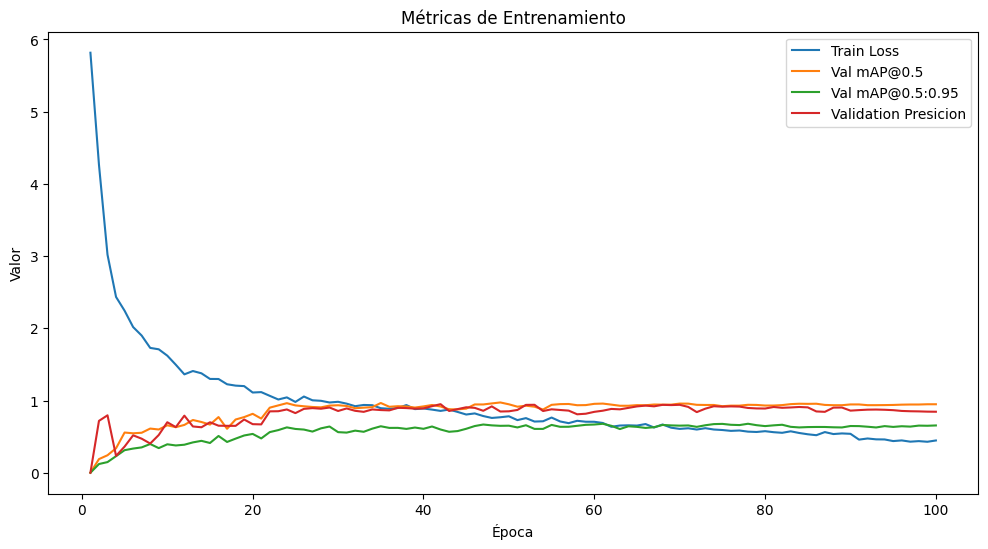

In [ ]:
print(df_metrics.columns.to_list())
# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Presicion')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Métricas de Entrenamiento')
plt.legend()
plt.show()

In [ ]:
# Evaluar el modelo
results = model.val()

# Mostrar los resultados
print(results)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1063.4±295.1 MB/s, size: 44.1 KB)


val: Scanning /content/recognition-id-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


                   all         10         33      0.859      0.931      0.959       0.68
             firstname         10         10      0.875        0.9      0.966      0.616
       identity-number         10         10      0.879          1      0.995      0.702
              lastname          7          7      0.861          1      0.924      0.607
        lastname_first          3          3      0.689      0.757      0.913      0.679
       lastname_second          3          3       0.99          1      0.995      0.796
Speed: 0.5ms preprocess, 13.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to proyecto_cedulas/entrenamiento_cedulas3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78b976d39f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confid

In [ ]:
# Cargar el modelo entrenado
# modelo_entrenado = YOLO("/content/yolov8n.pt")
#modelo_entrenado = YOLO("/content/proyecto_cedulas/entrenamiento_cedulas/weights/best.pt")

# Realizar inferencia en una imagen
#resultados = modelo_entrenado.predict(source="/content/cedula4.png", save=True)

# Acceder a los resultados
#for resultado in resultados:
#   print(f"Predicciones para la imagen: {resultado.path}")
#
#   for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
#        print(f"Bounding Box: {caja} - Confianza: {conf} - Clase: {clase}")

FileNotFoundError: /content/cedula4.png does not exist

In [ ]:
# Cargar y mostrar la imagen con las predicciones
#img = Image.open("/content/runs/detect/predict2/cedula4.jpg")
#plt.imshow(img)
#plt.axis('off')  # Ocultar los ejes
#plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/predict2/cedula4.jpg'

In [ ]:
import shutil
from google.colab import files

# Nombre de la carpeta a comprimir y descargar
folder_path = "/content/proyecto_cedulas"  # Ruta de la carpeta en Colab
output_filename = "cedulas.zip"   # Nombre del archivo zip de salida

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path)

# Descargar el archivo ZIP
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio openpyxl pytesseract
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import gradio as gr
import pandas as pd
import json
import pytesseract
from PIL import Image
import tempfile
import numpy as np

def procesar_cedula_gradio(img_pil):
    # Guardar imagen temporalmente
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp:
        img_path = tmp.name
        img_pil.save(img_path)

    # Ejecutar modelo YOLO
    results = model(img_path, conf=0.25, save=False)[0]

    datos_detectados = {}
    img_np = np.array(img_pil)

    for box in results.boxes:
        clase_idx = int(box.cls[0])
        nombre_clase = model.names[clase_idx]
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Recortar la región correspondiente
        region = img_np[y1:y2, x1:x2]
        region_pil = Image.fromarray(region)

        # Aplicar OCR
        texto = pytesseract.image_to_string(region_pil, config="--psm 6").strip()

        # Normalización específica para cédula
        if nombre_clase == "identity-number":
            texto = texto.replace("-", "").replace("–", "").strip()

        datos_detectados[nombre_clase] = texto

    # Guardar en JSON y Excel
    with open("resultado.json", "w") as f:
        json.dump(datos_detectados, f, indent=4)

    pd.DataFrame([datos_detectados]).to_excel("resultado.xlsx", index=False)

    return datos_detectados, "resultado.json", "resultado.xlsx"

##Interfaz Cédula frontal

In [ ]:
demo = gr.Interface(
    fn=procesar_cedula_gradio,
    inputs=gr.Image(type="pil", label="Sube una imagen de cédula PNG"),
    outputs=[
        gr.JSON(label="Datos extraídos con OCR"),
        gr.File(label="Descargar JSON"),
        gr.File(label="Descargar Excel")
    ],
    title="Extracción de datos de cédula ecuatoriana con OCR",
    description="Detecta regiones con YOLO y extrae texto real con pytesseract."
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5088efd5e5a8ec6b74.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
